In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.DataFrame()
for i in range(1,13):
    if i < 10:
        temp_df = pd.read_csv(f"DATA/JC-20200{i}-citibike-tripdata.csv")
    else:
        temp_df = pd.read_csv(f"DATA/JC-2020{i}-citibike-tripdata.csv")
    df = df.append(temp_df)

df = df.reset_index()
df = df.sample(frac=1)
#df.drop(['Start Station Name', 'End Station Name'], axis=1, inplace=True)
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,40.714584,-74.042817,45919,Subscriber,1990,1
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,40.724294,-74.035483,39283,Subscriber,1988,2
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,40.714145,-74.033552,42280,Subscriber,1959,1
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,40.719586,-74.043117,21147,Customer,1995,2
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,42472,Customer,1976,2


In [3]:
len(df)

336802

In [4]:
label_encoder = preprocessing.LabelEncoder()

In [5]:
df['usertype']= label_encoder.fit_transform(df['usertype'])

In [6]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,40.714584,-74.042817,45919,1,1990,1
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,40.724294,-74.035483,39283,1,1988,2
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,40.714145,-74.033552,42280,1,1959,1
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,40.719586,-74.043117,21147,0,1995,2
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,42472,0,1976,2


In [7]:
df['birth year'].isna().unique()

array([False])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


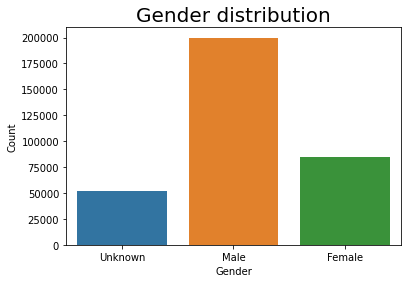

In [8]:
splot = sns.countplot('gender', data=df)
splot.axes.set_title("Gender distribution",fontsize=20)
splot.axes.set_xlabel("Gender",fontsize=10)
splot.axes.set_ylabel("Count",fontsize=10)
splot.axes.set_xticklabels(['Unknown', 'Male', 'Female'])
plt.show()

<AxesSubplot:xlabel='gender labels'>

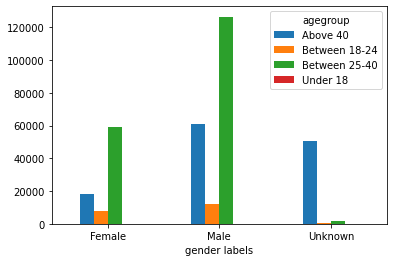

In [9]:
df['age'] = 2020 - df['birth year']

ages = df['age'].values.tolist()

agegroup = []

for age in ages:
    if(age<18):
        agegroup += ["Under 18"]
    elif(age>=18 and age<=24):
        agegroup += ["Between 18-24"]
    elif(age>24 and age<=40):
        agegroup += ["Between 25-40"]
    else:
        agegroup += ["Above 40"]

df['agegroup'] = agegroup

genders = df['gender']

gender_labels = []

for gender in genders:
    if(gender==0):
        gender_labels += ['Unknown']
    elif(gender==1):
        gender_labels += ['Male']
    else:
        gender_labels += ['Female']

df['gender labels'] = gender_labels


g = df.groupby('agegroup')#['hour of day cluster','start station name']



#g['gender labels'].value_counts()

#print(ghodc.value_counts())
#g.set_xticklabels(['Unknown', 'Male', 'Female'])
#g.xticks(rotation=30, horizontalalignment="center")

g["gender labels"].value_counts().unstack(0).plot.bar(rot=0)

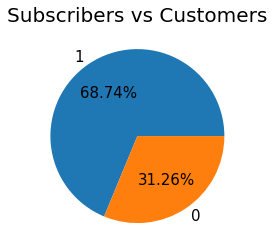

In [10]:
user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

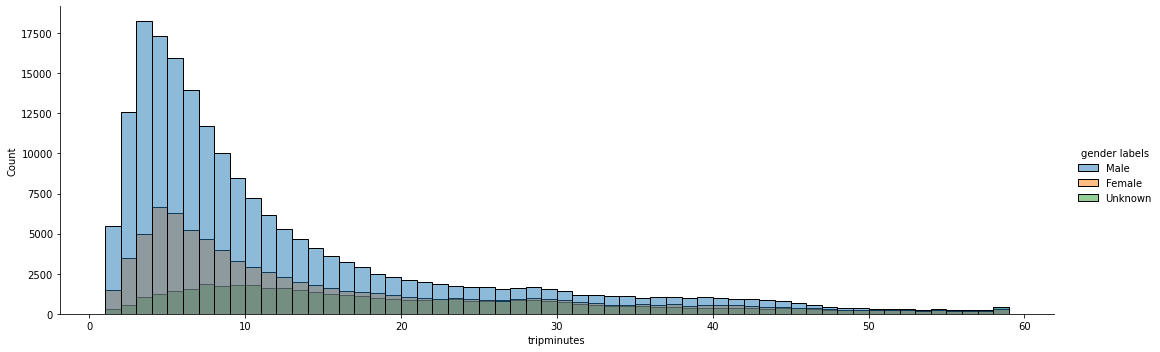

In [11]:
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,60), aspect=15/5, hue = "gender labels");
#sns.displot(data=df,x="tripminutes", hue = "gender",kind="kde",bins=range(1,61));

In [12]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,agegroup,gender labels,tripminutes
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,40.714584,-74.042817,45919,1,1990,1,30,Between 25-40,Male,7
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,40.724294,-74.035483,39283,1,1988,2,32,Between 25-40,Female,4
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,40.714145,-74.033552,42280,1,1959,1,61,Above 40,Male,36
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,40.719586,-74.043117,21147,0,1995,2,25,Between 25-40,Female,7
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,42472,0,1976,2,44,Above 40,Female,64


In [13]:
df["start station name"].value_counts()

Grove St PATH                 22930
Newport Pkwy                  19844
Liberty Light Rail            16933
Hamilton Park                 14718
Sip Ave                       13663
Marin Light Rail              13615
Newport PATH                  12855
Harborside                    12757
Columbus Dr at Exchange Pl    12586
JC Medical Center             10795
City Hall                      9715
Morris Canal                   9209
Warren St                      9177
Washington St                  8855
Paulus Hook                    8069
Newark Ave                     7872
Van Vorst Park                 7301
Columbus Drive                 7285
Jersey & 3rd                   6075
McGinley Square                5732
Brunswick St                   5485
Brunswick & 6th                5483
Jersey & 6th St                5388
Manila & 1st                   5346
Lincoln Park                   5339
Grand St                       5165
Baldwin at Montgomery          4865
Dixon Mills                 

In [14]:
df['month'] = pd.DatetimeIndex(df['starttime']).month

In [15]:
gk = df.groupby('month')
print(gk["start station name"].value_counts().to_string())

month  start station name        
1      Grove St PATH                 3100
       Sip Ave                       1493
       Hamilton Park                 1327
       Columbus Dr at Exchange Pl    1152
       Harborside                    1091
       Newport PATH                   989
       Marin Light Rail               904
       Brunswick & 6th                776
       City Hall                      745
       Newark Ave                     720
       Newport Pkwy                   641
       Manila & 1st                   632
       Warren St                      628
       Jersey & 3rd                   616
       Monmouth and 6th               613
       Jersey & 6th St                584
       Washington St                  575
       Columbus Drive                 556
       Morris Canal                   542
       McGinley Square                538
       Brunswick St                   529
       Van Vorst Park                 528
       Dixon Mills                    511


In [16]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,end station longitude,bikeid,usertype,birth year,gender,age,agegroup,gender labels,tripminutes,month
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,-74.042817,45919,1,1990,1,30,Between 25-40,Male,7,10
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,-74.035483,39283,1,1988,2,32,Between 25-40,Female,4,11
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,-74.033552,42280,1,1959,1,61,Above 40,Male,36,3
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,-74.043117,21147,0,1995,2,25,Between 25-40,Female,7,6
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,-74.055701,42472,0,1976,2,44,Above 40,Female,64,2


In [17]:
'''
Get hour of the day during which trip was made and store in separate column - will be used for getting clusters
'''
df['hour of day'] = pd.DatetimeIndex(df['starttime']).hour

In [18]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,bikeid,usertype,birth year,gender,age,agegroup,gender labels,tripminutes,month,hour of day
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,45919,1,1990,1,30,Between 25-40,Male,7,10,0
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,39283,1,1988,2,32,Between 25-40,Female,4,11,6
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,42280,1,1959,1,61,Above 40,Male,36,3,15
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,21147,0,1995,2,25,Between 25-40,Female,7,6,9
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,42472,0,1976,2,44,Above 40,Female,64,2,19


In [19]:
'''
0:00-5:59hrs - 1
6:00-11:59hrs - 2
12:00-17:59 - 3
18:00-23:59 - 4

Day has been divided into 4 parts based on the hours at which the trips
are being made
'''

hour_cluster = []
hours = df['hour of day'].values.tolist()

for entry in hours:
    if(entry >= 0 and entry < 6):
        hour_cluster += [1]
    elif(entry >= 6 and entry < 12):
        hour_cluster += [2]
    elif(entry >= 12 and entry < 18):
        hour_cluster += [3]
    elif(entry >= 18 and entry < 24):
        hour_cluster += [4]
        
df['hour of day cluster'] = hour_cluster
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,age,agegroup,gender labels,tripminutes,month,hour of day,hour of day cluster
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,1,1990,1,30,Between 25-40,Male,7,10,0,1
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,1,1988,2,32,Between 25-40,Female,4,11,6,2
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,1,1959,1,61,Above 40,Male,36,3,15,3
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,0,1995,2,25,Between 25-40,Female,7,6,9,2
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,0,1976,2,44,Above 40,Female,64,2,19,4


In [20]:
'''
Analyzing data based on time to see how long people are generally
interested to drive on bikes
'''

avg_tripmins = df['tripminutes'].mean()
max_tripmins = df['tripminutes'].max()
min_tripmins = df['tripminutes'].min()

df['trip_above_15'] = np.where(df['tripminutes']>15,1,0)
df['trip_above_30'] = np.where(df['tripminutes']>30,1,0)
df['trip_above_60'] = np.where(df['tripminutes']>60,1,0)

df['trip_above_60'].value_counts()

0    317333
1     19469
Name: trip_above_60, dtype: int64

<AxesSubplot:xlabel='start station name'>

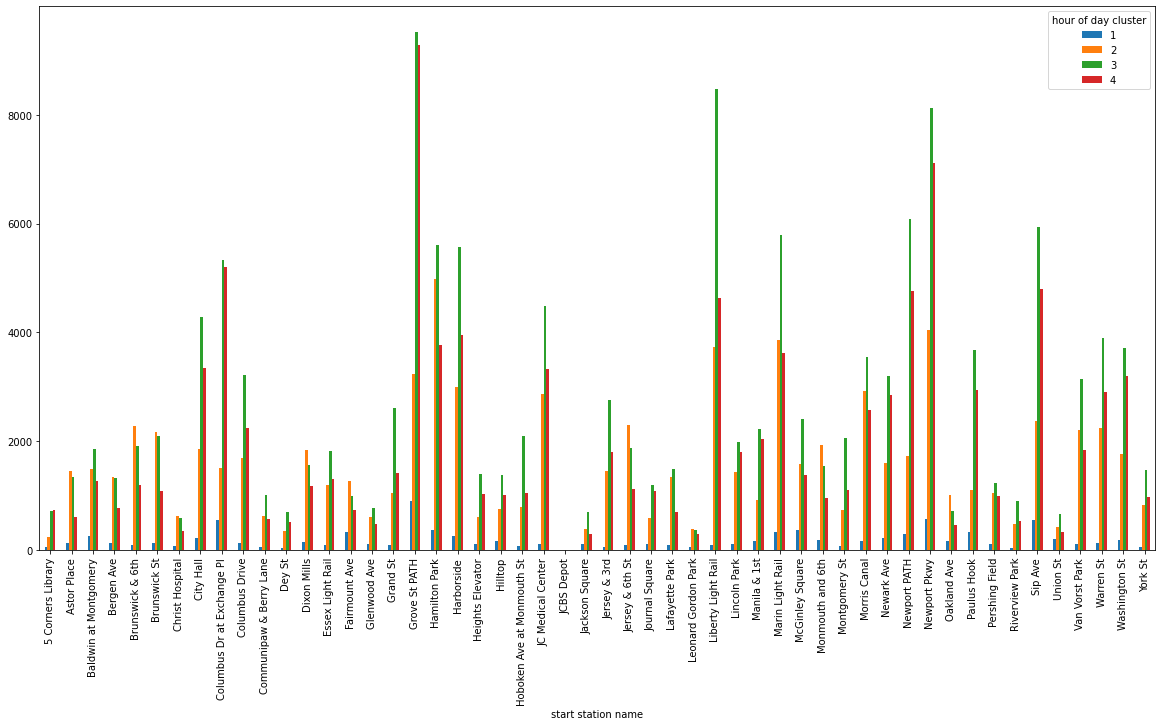

In [21]:
'''
Data grouped based on hour of day clusters(1,2,3,4) and then plotted based on start station
'''

plt.rcParams['figure.figsize'] = [20, 10]

ghodc = df.groupby(['hour of day cluster'])#['hour of day cluster','start station name']
#print(ghodc.value_counts())
ghodc["start station name"].value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='end station name'>

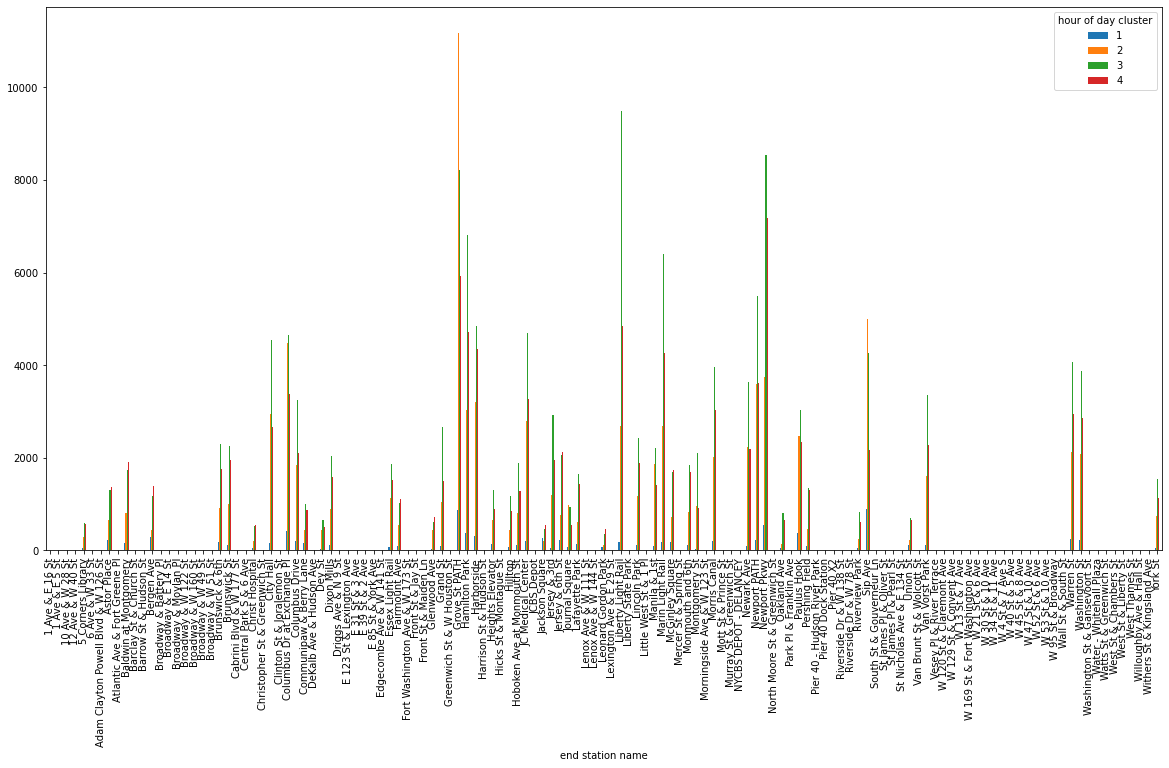

In [22]:
'''
Data grouped based on hour of day clusters(1,2,3,4) and then plotted based on end station

Interesting note post analysis - data from end station for main hubs(places with peaks in start & end stations)
coincides well. That is - look at Grove St Park. In the 2nd hour cluster, they are have they are the most sought after
end station while in cluster 3, looking at graph above, we can see that Grove St. Park is the most sought after start
station. Some hubs coincide this way which is great. Our task could be to identify those hubs that don't as it could
give more information on where to bifurcate these resources.

Also, numerical calcs could be done - like at Grove St James, in cluster 2 end stations upwards of 11k bikes are there.
However, incase of demand, only upwards of 9k bikes are being used. In a way, that's like 2k bikes going stagnant.

IMPORTANT POINT TO NOTE:
Analysis being done is on whole dataset, i.e. over 12 months. Microscoping analysis could provide more information
'''

ghodc = df.groupby(['hour of day cluster'])#['hour of day cluster','start station name']
#print(ghodc.value_counts())
ghodc["end station name"].value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='hour of day cluster'>

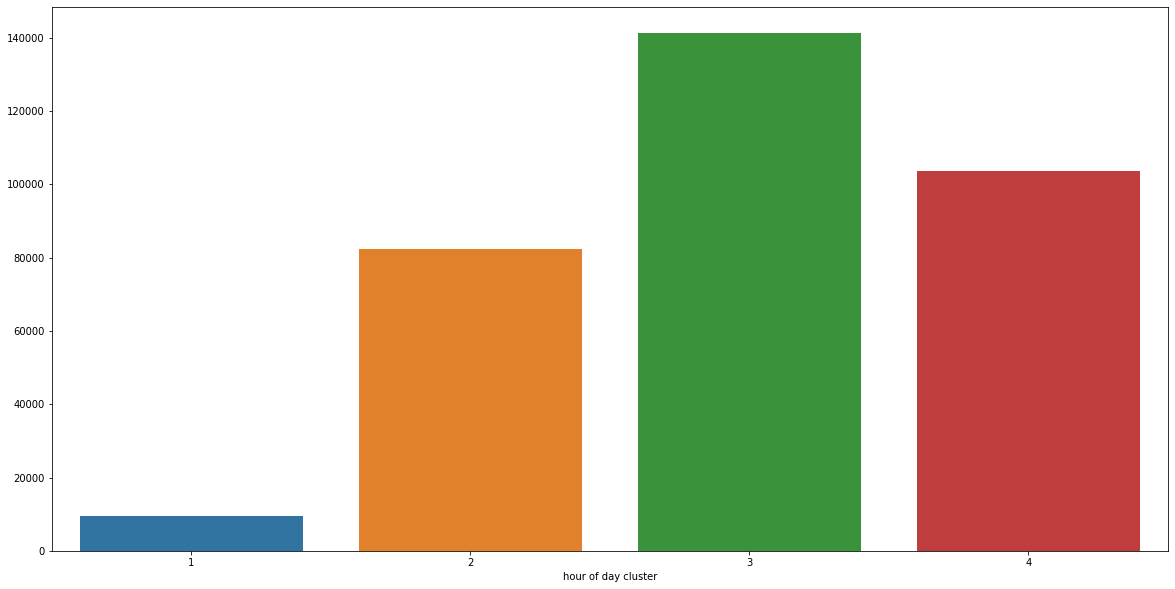

In [23]:
import seaborn as sns

'''
plot to see which are the peak hours in a day
'''

ghodc_size = ghodc.size()

sns.barplot(x = ghodc_size.index, y = ghodc_size.values)

In [24]:
import math

'''
Getting distance in miles and then storing in dataframe for further analysis
'''

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return round(d*0.621371,2)

start_lat = df['start station latitude'].values.tolist()
start_long = df['start station longitude'].values.tolist()
end_lat = df['end station latitude'].values.tolist()
end_long = df['end station longitude'].values.tolist()

distances = []
for i in range(0, len(start_lat)):
    distances += [distance((start_lat[i], start_long[i]), (end_lat[i], end_long[i]))]

df['distance'] = distances
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,agegroup,gender labels,tripminutes,month,hour of day,hour of day cluster,trip_above_15,trip_above_30,trip_above_60,distance
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,Between 25-40,Male,7,10,0,1,0,0,0,0.55
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,Between 25-40,Female,4,11,6,2,0,0,0,0.60
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,Above 40,Male,36,3,15,3,1,1,0,2.17
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,Between 25-40,Female,7,6,9,2,0,0,0,0.40
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,Above 40,Female,64,2,19,4,1,1,1,0.00


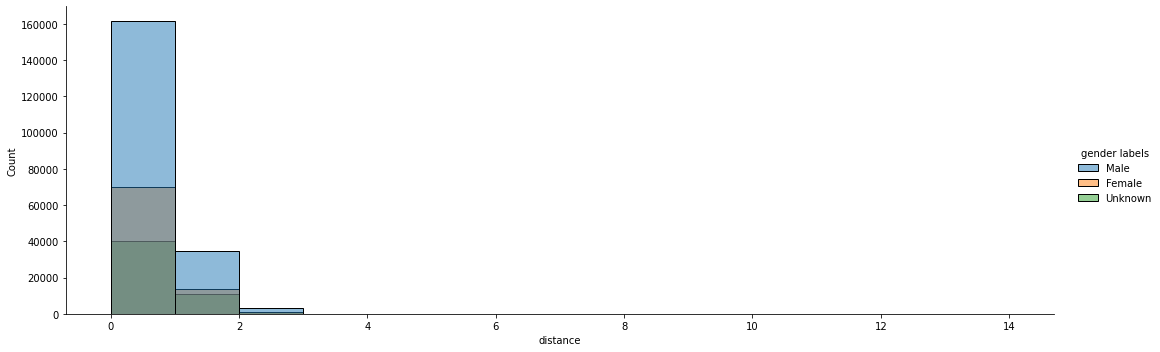

In [25]:
avg_dist = df['distance'].mean()
max_dist = df['distance'].max()
min_dist = df['distance'].min()

sns.displot(data=df,x="distance", bins=range(0,15), aspect=15/5, hue = "gender labels");


In [26]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,agegroup,gender labels,tripminutes,month,hour of day,hour of day cluster,trip_above_15,trip_above_30,trip_above_60,distance
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,Between 25-40,Male,7,10,0,1,0,0,0,0.55
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,Between 25-40,Female,4,11,6,2,0,0,0,0.60
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,Above 40,Male,36,3,15,3,1,1,0,2.17
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,Between 25-40,Female,7,6,9,2,0,0,0,0.40
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,Above 40,Female,64,2,19,4,1,1,1,0.00


In [27]:
df.columns

df['gender labels'] = np.where(df['gender labels']=="Male", 0, 1)
set(df['agegroup'].values.tolist())
df['agegroup'] = np.where(df['agegroup']=="Under 18", 0, np.where(df['agegroup']=="Between 18-24", 1, np.where(df['agegroup']=="Between 25-40", 2, 3)))
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,agegroup,gender labels,tripminutes,month,hour of day,hour of day cluster,trip_above_15,trip_above_30,trip_above_60,distance
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,2,0,7,10,0,1,0,0,0,0.55
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,2,1,4,11,6,2,0,0,0,0.60
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,3,0,36,3,15,3,1,1,0,2.17
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,2,1,7,6,9,2,0,0,0,0.40
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,3,1,64,2,19,4,1,1,1,0.00


In [28]:
#size = 50000

X = df[['start station id', 'start station latitude', 'start station longitude' ,'end station id', 'end station latitude', 'end station longitude', 'bikeid', 'agegroup', 'gender labels', 'tripminutes', 'distance']]#[0:size]
y = df['hour of day cluster']#[0:size]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test)

(336802, 336802, 225657, 225657, 111145, 111145)

In [29]:
from collections import Counter
print(y)
Counter(y.values.tolist())

273253    1
313054    2
55383     3
102887    2
32909     4
         ..
331864    1
133789    4
325148    2
13961     4
243583    4
Name: hour of day cluster, Length: 336802, dtype: int64


Counter({1: 9620, 2: 82297, 3: 141299, 4: 103586})

In [34]:
'''%%time

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


    
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_train)
labels = km.predict(X_train)
score = silhouette_score(X_train, labels)
'''

## plot scores
# YOUR CODE


'%%time\n\nfrom sklearn.metrics import silhouette_score\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\n\n\n    \nkm = KMeans(n_clusters=4, random_state=42)\nkm.fit(X_train)\nlabels = km.predict(X_train)\nscore = silhouette_score(X_train, labels)\n'

In [35]:
'''pred = km.predict(X_train)

len(pred), len(y_train)

actual_y = y_train.values.tolist()

correct = 0

for i in range(0, len(pred)):
    if(int(pred[i])==int(actual_y[i])):
        correct += 1
        
correct/len(pred)'''

'pred = km.predict(X_train)\n\nlen(pred), len(y_train)\n\nactual_y = y_train.values.tolist()\n\ncorrect = 0\n\nfor i in range(0, len(pred)):\n    if(int(pred[i])==int(actual_y[i])):\n        correct += 1\n        \ncorrect/len(pred)'

In [36]:
from babyplots import Babyplot

def visualize(datapoints, labels):
    bp = Babyplot(background_color="#ffffffff", turntable=True)
    bp.add_plot(
        datapoints,
        "pointCloud",
        "categories",
        np.array(labels).tolist(),
        {
            "colorScale": "Dark2", 
            "showLegend": True
        }
    )
    return bp

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred))

Counter(pred)

0.4316973323136443


Counter({3: 90637, 4: 8835, 2: 11673})

In [40]:
Counter(y_test)

Counter({2: 27085, 1: 3173, 4: 34441, 3: 46446})

In [41]:
df.columns

Index(['index', 'tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age', 'agegroup', 'gender labels',
       'tripminutes', 'month', 'hour of day', 'hour of day cluster',
       'trip_above_15', 'trip_above_30', 'trip_above_60', 'distance'],
      dtype='object')

In [42]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,agegroup,gender labels,tripminutes,month,hour of day,hour of day cluster,trip_above_15,trip_above_30,trip_above_60,distance
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,2,0,7,10,0,1,0,0,0,0.55
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,2,1,4,11,6,2,0,0,0,0.60
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,3,0,36,3,15,3,1,1,0,2.17
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,2,1,7,6,9,2,0,0,0,0.40
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,3,1,64,2,19,4,1,1,1,0.00


In [43]:
df['date'] = pd.DatetimeIndex(df['starttime']).day

In [44]:
df

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,gender labels,tripminutes,month,hour of day,hour of day cluster,trip_above_15,trip_above_30,trip_above_60,distance,date
273253,53339,440,2020-10-12 00:02:01.3860,2020-10-12 00:09:22.1020,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3276,Marin Light Rail,...,0,7,10,0,1,0,0,0,0.55,12
313054,9221,285,2020-11-12 06:48:49.7120,2020-11-12 06:53:35.0550,3211,Newark Ave,40.721525,-74.046305,3638,Washington St,...,1,4,11,6,2,0,0,0,0.60,12
55383,6401,2210,2020-03-09 15:00:08.0250,2020-03-09 15:36:58.8940,3677,Glenwood Ave,40.727551,-74.071061,3184,Paulus Hook,...,0,36,3,15,3,1,1,0,2.17,9
102887,1841,450,2020-06-03 09:39:46.3100,2020-06-03 09:47:17.2620,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,...,1,7,6,9,2,0,0,0,0.40,3
32909,6889,3841,2020-02-09 19:14:18.1870,2020-02-09 20:18:19.5230,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,...,1,64,2,19,4,1,1,1,0.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331864,6756,180,2020-12-14 05:47:45.9180,2020-12-14 05:50:46.0690,3209,Brunswick St,40.724176,-74.050656,3273,Manila & 1st,...,1,3,12,5,1,0,0,0,0.44,14
133789,32743,8563,2020-06-27 18:44:56.4990,2020-06-27 21:07:40.2890,3278,Monmouth and 6th,40.725685,-74.048790,3185,City Hall,...,1,142,6,18,4,1,1,1,0.61,27
325148,40,266,2020-12-01 07:09:53.0160,2020-12-01 07:14:19.1170,3270,Jersey & 6th St,40.725289,-74.045572,3186,Grove St PATH,...,1,4,12,7,2,0,0,0,0.41,1
13961,13961,230,2020-01-16 18:19:22.5140,2020-01-16 18:23:12.7730,3203,Hamilton Park,40.727596,-74.044247,3273,Manila & 1st,...,0,3,1,18,4,0,0,0,0.42,16


In [45]:
groupby_hodc_station = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).mean().reset_index()
groupby_hodc_station

,date,month,start station id,hour of day cluster,index,tripduration,start station latitude,start station longitude,end station id,end station latitude,...,gender,age,agegroup,gender labels,tripminutes,hour of day,trip_above_15,trip_above_30,trip_above_60,distance
0,1,1,3184,2,99.000000,234.0,40.714145,-74.033552,3271.000000,40.715387,...,1.000000,30.500000,2.000000,0.000000,3.500000,11.000000,0.000000,0.0,0.0,0.3450
1,1,1,3184,3,228.500000,248.5,40.714145,-74.033552,3639.000000,40.719252,...,1.500000,62.500000,3.000000,0.500000,4.000000,15.000000,0.000000,0.0,0.0,0.3500
2,1,1,3184,4,326.000000,1322.0,40.714145,-74.033552,3184.000000,40.714145,...,1.000000,32.000000,2.000000,0.000000,22.000000,19.000000,1.000000,0.0,0.0,0.0000
3,1,1,3185,1,22.000000,559.5,40.717732,-74.043845,3238.500000,40.718820,...,1.000000,35.500000,2.000000,0.000000,9.000000,2.000000,0.000000,0.0,0.0,0.8050
4,1,1,3185,3,197.800000,641.8,40.717732,-74.043845,3367.600000,40.723460,...,1.000000,42.800000,2.400000,0.000000,10.200000,13.800000,0.200000,0.0,0.0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51873,31,12,3681,4,11689.500000,645.0,40.715178,-74.037683,3440.000000,40.721961,...,0.500000,45.500000,2.500000,0.500000,10.000000,22.500000,0.000000,0.0,0.0,0.4900
51874,31,12,3791,3,11557.333333,1190.0,40.735208,-74.046964,3494.333333,40.728731,...,0.333333,46.666667,2.666667,0.666667,19.333333,15.666667,0.666667,0.0,0.0,0.7500
51875,31,12,3791,4,11668.000000,983.0,40.735208,-74.046964,3203.000000,40.727596,...,1.000000,35.000000,2.000000,0.000000,16.000000,20.000000,1.000000,0.0,0.0,0.5400
51876,31,12,3792,3,11560.250000,306.0,40.716870,-74.032810,3438.500000,40.718775,...,1.500000,38.750000,2.250000,0.500000,4.750000,15.250000,0.000000,0.0,0.0,0.4625


In [46]:
size = list(df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).size())



start_df = pd.DataFrame()


start_df['station id'] = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).sum().reset_index()['start station id']
start_df['hodc outflow'] = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).mean().reset_index()['hour of day cluster']
start_df['outflow count'] = size
start_df['age'] = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).mean().reset_index()['age']


start_df['tripmins outflow'] = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).mean().reset_index()['tripminutes']
start_df['distance outflow'] = df.groupby(['date', 'month', 'start station id', 'hour of day cluster']).mean().reset_index()['distance']

start_df


,station id,hodc outflow,outflow count,age,tripmins outflow,distance outflow
0,3184,2,2,30.500000,3.500000,0.3450
1,3184,3,2,62.500000,4.000000,0.3500
2,3184,4,1,32.000000,22.000000,0.0000
3,3185,1,2,35.500000,9.000000,0.8050
4,3185,3,5,42.800000,10.200000,1.0000
...,...,...,...,...,...,...
51873,3681,4,2,45.500000,10.000000,0.4900
51874,3791,3,3,46.666667,19.333333,0.7500
51875,3791,4,1,35.000000,16.000000,0.5400
51876,3792,3,4,38.750000,4.750000,0.4625


In [47]:
size = list(df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).size())



end_df = pd.DataFrame()


end_df['station id'] = df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).sum().reset_index()['end station id']
end_df['hodc inflow'] = df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).mean().reset_index()['hour of day cluster']
end_df['inflow count'] = size
end_df['age'] = df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).mean().reset_index()['age']


end_df['tripmins inflow'] = df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).mean().reset_index()['tripminutes']
end_df['distance inflow'] = df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).mean().reset_index()['distance']

end_df


,station id,hodc inflow,inflow count,age,tripmins inflow,distance inflow
0,3184,2,3,32.0,3.333333,0.496667
1,3184,3,1,30.0,2.000000,0.290000
2,3184,4,1,32.0,22.000000,0.000000
3,3185,1,1,32.0,3.000000,0.380000
4,3185,3,6,46.0,2.166667,0.313333
...,...,...,...,...,...,...
51907,3681,4,1,40.0,10.000000,0.000000
51908,3694,4,1,51.0,21.000000,1.850000
51909,3791,4,1,35.0,39.000000,1.240000
51910,3792,3,2,25.0,8.000000,0.480000


In [62]:
new_df = pd.concat([start_df, end_df], axis=1)
new_df

,station id,hodc outflow,outflow count,age,tripmins outflow,distance outflow,station id,hodc inflow,inflow count,age,tripmins inflow,distance inflow
0,3184.0,2.0,2.0,30.5,3.5,0.345,3184,2,3,32.0,3.333333,0.496667
1,3184.0,3.0,2.0,62.5,4.0,0.350,3184,3,1,30.0,2.000000,0.290000
2,3184.0,4.0,1.0,32.0,22.0,0.000,3184,4,1,32.0,22.000000,0.000000
3,3185.0,1.0,2.0,35.5,9.0,0.805,3185,1,1,32.0,3.000000,0.380000
4,3185.0,3.0,5.0,42.8,10.2,1.000,3185,3,6,46.0,2.166667,0.313333
...,...,...,...,...,...,...,...,...,...,...,...,...
51907,NaN,NaN,NaN,NaN,NaN,NaN,3681,4,1,40.0,10.000000,0.000000
51908,NaN,NaN,NaN,NaN,NaN,NaN,3694,4,1,51.0,21.000000,1.850000
51909,NaN,NaN,NaN,NaN,NaN,NaN,3791,4,1,35.0,39.000000,1.240000
51910,NaN,NaN,NaN,NaN,NaN,NaN,3792,3,2,25.0,8.000000,0.480000


In [63]:
'''df.groupby(['date', 'month', 'start station id']).mean().reset_index()

groupby_start_station_sum = df.groupby(['date', 'month', 'start station id'])['date', 'month', 'start station id'].size()

start_station_id = df.groupby(['date', 'month', 'start station id']).sum().reset_index()['start station id']

start_df = pd.DataFrame()
start_df['station id'] = start_station_id
start_df['station outflow count'] = list(groupby_start_station_sum)

start_df['tripmins outflow'] = df.groupby(['date', 'month', 'start station id']).mean().reset_index()['tripminutes']
start_df['distance outflow'] = df.groupby(['date', 'month', 'start station id']).mean().reset_index()['distance']
start_df['hodc outflow'] = df.groupby(['date', 'month', 'start station id']).mean().reset_index()['hour of day cluster']


start_df

df.groupby(['date', 'month', 'end station id']).mean().reset_index()

groupby_end_station_sum = df.groupby(['date', 'month', 'end station id'])['date', 'month', 'end station id'].size()

end_station_id = df.groupby(['date', 'month', 'end station id']).sum().reset_index()['end station id']

end_df = pd.DataFrame()
end_df['station id'] = end_station_id
end_df['station inflow count'] = list(groupby_end_station_sum)

end_df['tripmins inflow'] = df.groupby(['date', 'month', 'end station id']).mean().reset_index()['tripminutes']
end_df['distance inflow'] = df.groupby(['date', 'month', 'end station id']).mean().reset_index()['distance']
end_df['hodc inflow'] = df.groupby(['date', 'month', 'end station id']).mean().reset_index()['hour of day cluster']

end_df

new_df = pd.concat([end_df, start_df], axis=1)
new_df
'''

'''end_df_list = end_df.values.tolist()

new_df = pd.DataFrame()
new_df['station id'] = start_df['station id']
new_df['start station counts'] = start_df['start station counts']
new_df['end station counts'] = [-1]*len(new_df)

gap = 0

#print(new_df['station id'][2])

low_demand_stations = []

for i in range(0, len(end_df_list)):
    if(end_df_list[i][0]==new_df['station id'][i-gap]):
        new_df['end station counts'][i-gap] = end_df_list[i][1]
    else:
        gap += 1
        low_demand_stations += [i, end_df_list[i][0]]
        
use_df = new_df[0:10296]'''



"end_df_list = end_df.values.tolist()\n\nnew_df = pd.DataFrame()\nnew_df['station id'] = start_df['station id']\nnew_df['start station counts'] = start_df['start station counts']\nnew_df['end station counts'] = [-1]*len(new_df)\n\ngap = 0\n\n#print(new_df['station id'][2])\n\nlow_demand_stations = []\n\nfor i in range(0, len(end_df_list)):\n    if(end_df_list[i][0]==new_df['station id'][i-gap]):\n        new_df['end station counts'][i-gap] = end_df_list[i][1]\n    else:\n        gap += 1\n        low_demand_stations += [i, end_df_list[i][0]]\n        \nuse_df = new_df[0:10296]"

In [64]:
#df.groupby(['date', 'month', 'end station id', 'hour of day cluster']).sum().reset_index()

new_nona_df = new_df.dropna()

print(len(new_df)-len(new_nona_df), "stations that have no outflows - so demand low supply high")

34 stations that have no outflows - so demand low supply high


In [65]:
new_nona_df

,station id,hodc outflow,outflow count,age,tripmins outflow,distance outflow,station id,hodc inflow,inflow count,age,tripmins inflow,distance inflow
0,3184.0,2.0,2.0,30.500000,3.500000,0.3450,3184,2,3,32.0,3.333333,0.496667
1,3184.0,3.0,2.0,62.500000,4.000000,0.3500,3184,3,1,30.0,2.000000,0.290000
2,3184.0,4.0,1.0,32.000000,22.000000,0.0000,3184,4,1,32.0,22.000000,0.000000
3,3185.0,1.0,2.0,35.500000,9.000000,0.8050,3185,1,1,32.0,3.000000,0.380000
4,3185.0,3.0,5.0,42.800000,10.200000,1.0000,3185,3,6,46.0,2.166667,0.313333
...,...,...,...,...,...,...,...,...,...,...,...,...
51873,3681.0,4.0,2.0,45.500000,10.000000,0.4900,3273,4,1,31.0,20.000000,0.750000
51874,3791.0,3.0,3.0,46.666667,19.333333,0.7500,3275,2,3,47.0,15.666667,0.290000
51875,3791.0,4.0,1.0,35.000000,16.000000,0.5400,3275,3,4,37.0,12.000000,0.587500
51876,3792.0,3.0,4.0,38.750000,4.750000,0.4625,3275,4,1,33.0,5.000000,0.800000


In [66]:
'''
1 -> more supply
0 -> demand supply equal
-1 -> more demand
'''

new_nona_df['supply demand category'] = np.where(new_nona_df['inflow count']>new_nona_df['outflow count'], 1, 0) #np.where(new_nona_df['inflow count']==new_nona_df['outflow count'], 0, 1))

new_nona_df


/var/folders/8f/tdfb02g50ks_hkp6psmcq3j80000gn/T/ipykernel_4829/763089989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nona_df['supply demand category'] = np.where(new_nona_df['inflow count']>new_nona_df['outflow count'], 1, 0) #np.where(new_nona_df['inflow count']==new_nona_df['outflow count'], 0, 1))


,station id,hodc outflow,outflow count,age,tripmins outflow,distance outflow,station id,hodc inflow,inflow count,age,tripmins inflow,distance inflow,supply demand category
0,3184.0,2.0,2.0,30.500000,3.500000,0.3450,3184,2,3,32.0,3.333333,0.496667,1
1,3184.0,3.0,2.0,62.500000,4.000000,0.3500,3184,3,1,30.0,2.000000,0.290000,0
2,3184.0,4.0,1.0,32.000000,22.000000,0.0000,3184,4,1,32.0,22.000000,0.000000,0
3,3185.0,1.0,2.0,35.500000,9.000000,0.8050,3185,1,1,32.0,3.000000,0.380000,0
4,3185.0,3.0,5.0,42.800000,10.200000,1.0000,3185,3,6,46.0,2.166667,0.313333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51873,3681.0,4.0,2.0,45.500000,10.000000,0.4900,3273,4,1,31.0,20.000000,0.750000,0
51874,3791.0,3.0,3.0,46.666667,19.333333,0.7500,3275,2,3,47.0,15.666667,0.290000,0
51875,3791.0,4.0,1.0,35.000000,16.000000,0.5400,3275,3,4,37.0,12.000000,0.587500,1
51876,3792.0,3.0,4.0,38.750000,4.750000,0.4625,3275,4,1,33.0,5.000000,0.800000,0


In [67]:
from sklearn.model_selection import train_test_split

X = new_nona_df[['station id', 'hodc inflow', 'hodc outflow', 'age', 'tripmins inflow', 'tripmins outflow', 'distance outflow', 'distance outflow', 'inflow count', 'outflow count']]
y = new_nona_df['supply demand category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
pred_train = knn.predict(X_train)
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred))

print(metrics.classification_report(y_test, pred))

print(metrics.confusion_matrix(y_test, pred))


0.7997295586627539
0.794392523364486
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      9528
           1       0.83      0.68      0.74      7592

    accuracy                           0.79     17120
   macro avg       0.80      0.78      0.79     17120
weighted avg       0.80      0.79      0.79     17120

[[8475 1053]
 [2467 5125]]


In [60]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


    
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train).transform(X_train)
labels = kmeans.predict(X_train)
score = silhouette_score(X_train, labels)



In [61]:
pred = kmeans.predict(X_train)

len(pred), len(y_train)

actual_y = y_train.values.tolist()

correct = 0

for i in range(0, len(pred)):
    if(int(pred[i])==int(actual_y[i])):
        correct += 1
        
correct/len(pred)

0.5580010357327809

In [74]:
import folium
df_sub = df[['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude']]
# df_routes = df_sub.groupby(['Start Station Name','Start Station Latitude', 'Start Station Longitude', 'End Station Name', 'End Station Latitude','End Station Longitude']).size().reset_index(name='Counts of trips')

# df_routes = df_routes.nlargest(50, columns=['Counts of trips'])
# # print(df_routes)

# df_sub = df_sub[df_sub['Start Station Name'] != df_sub['End Station Name']]
df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']
# # perform the transformation asked
df_sub = df_sub.groupby(['start station name','start station latitude', 'start station longitude', 'end station name', 'end station latitude','end station longitude'])['both'].count().reset_index(name='Counts of trips')



df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
len(set(df_sub['start station name'])) + len(set(df_sub['end station name']))


/var/folders/8f/tdfb02g50ks_hkp6psmcq3j80000gn/T/ipykernel_4829/1072515911.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']


113

In [75]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150
    
#     m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end station latitude"], row["end station longitude"]], popup=row["end station name"],radius=5, color="Red").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start station latitude"], row["start station longitude"]],popup=row["start station name"], color="Green").add_to(map1), axis=1)


map1